# **UK Cities vs Population**
Dataset URL: https://simplemaps.com/data/gb-cities

In [ ]:
import numpy as np
import json
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_json('gb.json')

In [ ]:
df

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,London,51.5072,-0.1275,United Kingdom,GB,"London, City of",primary,11262000,8825001
1,Birmingham,52.4800,-1.9025,United Kingdom,GB,Birmingham,,2919600,1137100
2,Manchester,53.4794,-2.2453,United Kingdom,GB,Manchester,,2705000,547627
3,Liverpool,53.4075,-2.9919,United Kingdom,GB,Liverpool,,864122,513441
4,Portsmouth,50.8058,-1.0872,United Kingdom,GB,Portsmouth,,855679,248440
...,...,...,...,...,...,...,...,...,...
675,Harton,54.8810,-1.5340,United Kingdom,GB,South Tyneside,,2878,2878
676,Kinghorn,56.0700,-3.1700,United Kingdom,GB,Fife,,2840,2840
677,Appledore,51.0525,-4.1945,United Kingdom,GB,Devon,,2814,2814
678,New Earswick,53.9920,-1.0724,United Kingdom,GB,York,,2737,2737


In [ ]:
df.shape

(680, 9)

In [ ]:
df.columns.tolist()

['city',
 'lat',
 'lng',
 'country',
 'iso2',
 'admin_name',
 'capital',
 'population',
 'population_proper']

In [ ]:
# Rename columns for clarity
df.rename(columns={'city': 'City', 'lat': 'Latitude', 'lng': 'Longitude', 'country': 'Country', 'iso2': 'Country Code', 'admin_name': 'Mainland', 'capital': 'Capital', 'population': 'Population', 'population_proper': 'Real Population'}, inplace=True)

In [ ]:
df.columns.tolist()

['City',
 'Latitude',
 'Longitude',
 'Country',
 'Country Code',
 'Mainland',
 'Capital',
 'Population',
 'Real Population']

In [ ]:
#Cities in : ['Bournemouth', 'Boscombe', 'Southbourne', 'Parkstone']
# Fill empty values in the "Mainland" column with 'Bournemouth'
df['Mainland'] = df['Mainland'].replace('', pd.NA).fillna('Bournemouth')

In [ ]:
df

,City,Latitude,Longitude,Country,Country Code,Mainland,Capital,Population,Real Population
0,London,51.5072,-0.1275,United Kingdom,GB,"London, City of",primary,11262000,8825001
1,Birmingham,52.4800,-1.9025,United Kingdom,GB,Birmingham,,2919600,1137100
2,Manchester,53.4794,-2.2453,United Kingdom,GB,Manchester,,2705000,547627
3,Liverpool,53.4075,-2.9919,United Kingdom,GB,Liverpool,,864122,513441
4,Portsmouth,50.8058,-1.0872,United Kingdom,GB,Portsmouth,,855679,248440
...,...,...,...,...,...,...,...,...,...
675,Harton,54.8810,-1.5340,United Kingdom,GB,South Tyneside,,2878,2878
676,Kinghorn,56.0700,-3.1700,United Kingdom,GB,Fife,,2840,2840
677,Appledore,51.0525,-4.1945,United Kingdom,GB,Devon,,2814,2814
678,New Earswick,53.9920,-1.0724,United Kingdom,GB,York,,2737,2737


In [ ]:
# Code 1: City with highest population
city_highest_population = df.loc[df['Population'].idxmax()]

# Code 2: City with lowest population
city_lowest_population = df.loc[df['Population'].idxmin()]

# Displaying the results
print("City with highest population:")
print(city_highest_population[['City', 'Population']])

print("\nCity with lowest population:")
print(city_lowest_population[['City', 'Population']])

City with highest population:
City            London
Population    11262000
Name: 0, dtype: object

City with lowest population:
City          Bushbury
Population        2600
Name: 679, dtype: object


In [ ]:
# Code for the top 10 cities with the highest population
top_10_highest_population = df.nlargest(10, 'Population')

# Code for the top 10 cities with the lowest population
top_10_lowest_population = df.nsmallest(10, 'Population')

# Displaying the results
print("Top 10 cities with the highest population:")
print(top_10_highest_population[['City', 'Population']])

print("\nTop 10 cities with the lowest population:")
print(top_10_lowest_population[['City', 'Population']])

Top 10 cities with the highest population:
          City  Population
0       London    11262000
1   Birmingham     2919600
2   Manchester     2705000
3    Liverpool      864122
4   Portsmouth      855679
5  Southampton      855569
6   Nottingham      768638
7      Bristol      567111
8    Leicester      508916
9     Coventry      362690

Top 10 cities with the lowest population:
                     City  Population
679              Bushbury        2600
678          New Earswick        2737
677             Appledore        2814
676              Kinghorn        2840
675                Harton        2878
674              Stainton        2890
673              Swalwell        3200
672           Clackmannan        3240
671  Sherborne Saint John        3265
670          Menai Bridge        3376


In [ ]:
# Code for the top 10 cities with the highest population
top_20_highest_population = df.nlargest(20, 'Population')

# Code for the top 10 cities with the lowest population
top_20_lowest_population = df.nsmallest(20, 'Population')

# Displaying the results
print("Top 20 cities with the highest population:")
print(top_20_highest_population[['City', 'Population']])

print("\nTop 20 cities with the lowest population:")
print(top_20_lowest_population[['City', 'Population']])

Top 20 cities with the highest population:
             City  Population
0          London    11262000
1      Birmingham     2919600
2      Manchester     2705000
3       Liverpool      864122
4      Portsmouth      855679
5     Southampton      855569
6      Nottingham      768638
7         Bristol      567111
8       Leicester      508916
9        Coventry      362690
10        Belfast      333871
11      Stockport      295200
12       Bradford      293277
13       Plymouth      267918
14          Derby      255394
15    Westminster      255324
16  Wolverhampton      250970
17        Norwich      213166
18          Luton      213052
19       Solihull      206674

Top 20 cities with the lowest population:
                     City  Population
679              Bushbury        2600
678          New Earswick        2737
677             Appledore        2814
676              Kinghorn        2840
675                Harton        2878
674              Stainton        2890
673              S

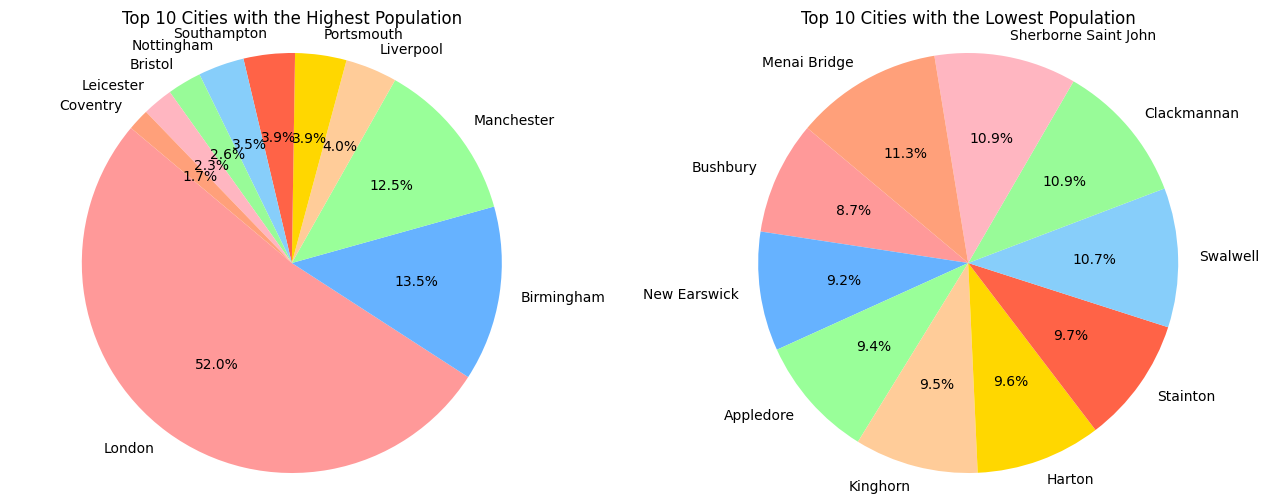

In [ ]:
import matplotlib.pyplot as plt

# Assuming top_10_highest_population and top_10_lowest_population are your DataFrames

# Pastel colors
pastel_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347', '#87CEFA', '#98FB98', '#FFB6C1', '#FFA07A']

# Plotting side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plotting the pie chart for the top 10 cities with the highest population
axes[0].pie(top_10_highest_population['Population'], labels=top_10_highest_population['City'], autopct='%1.1f%%', startangle=140, colors=pastel_colors)
axes[0].set_title('Top 10 Cities with the Highest Population')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plotting the pie chart for the top 10 cities with the lowest population
axes[1].pie(top_10_lowest_population['Population'], labels=top_10_lowest_population['City'], autopct='%1.1f%%', startangle=140, colors=pastel_colors)
axes[1].set_title('Top 10 Cities with the Lowest Population')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Displaying the side-by-side pie charts
plt.show()

In [ ]:
# Display unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values for column "{column}":\n{unique_values}\n{"="*30}\n')

Unique values for column "City":
['London' 'Birmingham' 'Manchester' 'Liverpool' 'Portsmouth' 'Southampton'
 'Nottingham' 'Bristol' 'Leicester' 'Coventry' 'Belfast' 'Stockport'
 'Bradford' 'Plymouth' 'Derby' 'Westminster' 'Wolverhampton' 'Norwich'
 'Luton' 'Solihull' 'Islington' 'Aberdeen' 'Croydon' 'Bournemouth'
 'Basildon' 'Ilford' 'Warrington' 'Kingswood' 'Oxford' 'Harrow'
 'West Bromwich' 'Gloucester' 'Blackpool' 'Sale' 'Tottenham' 'Cambridge'
 'Romford' 'Colchester' 'High Wycombe' 'Gateshead' 'Slough' 'Blackburn'
 'Chelmsford' 'Rochdale' 'Rotherham' 'Walthamstow' 'Maidstone'
 'Basingstoke' 'Salford' 'Hounslow' 'Wembley' 'Worcester' 'Hammersmith'
 'Rayleigh' 'Hemel Hempstead' 'Bath' 'Darlington' 'Hove' 'Hastings'
 'Watford' 'Stevenage' 'Hartlepool' 'Chester' 'Fulham' 'Nuneaton' 'Ealing'
 'Hayes' 'Aylesbury' 'Edmonton' 'Saint Albans' 'Burnley' 'Batley'
 'Scunthorpe' 'Dudley' 'Brixton' 'Paisley' 'Chatham' 'Edgware' 'East Ham'
 'Weston-super-Mare' 'Carlisle' 'South Shields' 'East Kilb

In [ ]:
# Display the number of unique values for each column
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f'Number of unique values for column "{column}": {num_unique_values}\n{"="*30}\n')

Number of unique values for column "City": 674

Number of unique values for column "Latitude": 650

Number of unique values for column "Longitude": 659

Number of unique values for column "Country": 1

Number of unique values for column "Country Code": 1

Number of unique values for column "Mainland": 188

Number of unique values for column "Capital": 2

Number of unique values for column "Population": 672

Number of unique values for column "Real Population": 672



In [ ]:
# Group cities by mainland
grouped_cities = df.groupby('Mainland')['City'].apply(list)

# Print the result
for Mainland, Cities in grouped_cities.items():
    print(f'Cities in {Mainland}: {Cities}')

Cities in Aberdeen City: ['Aberdeen', 'Dyce']
Cities in Aberdeenshire: ['Peterhead', 'Fraserburgh', 'Banff']
Cities in Angus: ['Arbroath', 'Carnoustie']
Cities in Ards and North Down: ['Bangor']
Cities in Barking and Dagenham: ['Barking']
Cities in Barnet: ['Edgware', 'Finchley', 'Barnet', 'Friern Barnet', 'East Barnet']
Cities in Barnsley: ['Wombwell', 'Hoyland Nether', 'Cudworth', 'Royston', 'Bolton upon Dearne']
Cities in Bath and North East Somerset: ['Bath', 'Keynsham', 'Midsomer Norton', 'Paulton']
Cities in Belfast: ['Belfast']
Cities in Bexley: ['Welling', 'Bexleyheath']
Cities in Birmingham: ['Birmingham', 'Small Heath', 'Bournville', 'Northfield', 'Longbridge', 'Kings Norton', 'Perry Barr', 'Harborne', 'Erdington', 'Castle Bromwich']
Cities in Blackburn with Darwen: ['Blackburn', 'Darwen']
Cities in Blackpool: ['Blackpool', 'Bispham']
Cities in Bolton: ['Farnworth', 'Westhoughton', 'Horwich']
Cities in Bournemouth: ['Bournemouth', 'Boscombe', 'Southbourne', 'Parkstone']
Citie